National Technical University of Athens  
School of Electrical and Computer Engineering   
Data Science and Machine Learning   
  
"Deep Learning Project"  
   
Creators:  
Zerkelidis Dimitris   
Kaiktzoglou Maria  
Trivyza Marilia

### Chest ray pre processing...

DL LINK FROM KAGGLE: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

More info for the dataset below:

https://data.mendeley.com/datasets/rscbjbr9sj/2

In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import torch
from pathlib import Path
from torch.utils.data import Dataset,DataLoader
from PIL import Image
from torchvision import transforms as T
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import Resize, Compose, ToTensor, Grayscale
import torchvision.models as models
from torchvision.transforms.functional import to_grayscale
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
path = Path('chest_xray')
im_sz = 256
bs = 16

In [3]:
train_normal = Path('chest_xray/train/NORMAL')
train_disease = Path('chest_xray/train/PNEUMONIA')

train_data = [(o,0) for o in train_normal.iterdir()]
train_data_disease = [(o,1) for o in train_disease.iterdir()]
train_data.extend(train_data_disease)

train_data = pd.DataFrame(train_data, columns=["filepath","disease"])
train_data.head()

,filepath,disease
0,chest_xray/train/NORMAL/NORMAL2-IM-1257-0001.jpeg,0
1,chest_xray/train/NORMAL/IM-0687-0001.jpeg,0
2,chest_xray/train/NORMAL/IM-0326-0001.jpeg,0
3,chest_xray/train/NORMAL/IM-0305-0001.jpeg,0
4,chest_xray/train/NORMAL/IM-0249-0001.jpeg,0


In [4]:
test_normal = Path('chest_xray/test/NORMAL')
test_disease = Path('chest_xray/test/PNEUMONIA')

test_data = [(o,0) for o in test_normal.iterdir()]
test_data_disease = [(o,1) for o in test_disease.iterdir()]
test_data.extend(test_data_disease)

test_data = pd.DataFrame(test_data, columns=["filepath","disease"])
test_data

,filepath,disease
0,chest_xray/test/NORMAL/NORMAL2-IM-0381-0001.jpeg,0
1,chest_xray/test/NORMAL/NORMAL2-IM-0213-0001.jpeg,0
2,chest_xray/test/NORMAL/NORMAL2-IM-0041-0001.jpeg,0
3,chest_xray/test/NORMAL/IM-0103-0001.jpeg,0
4,chest_xray/test/NORMAL/NORMAL2-IM-0252-0001.jpeg,0


#### grayscale + resize

cvtColor does the grayscale
and then Resize makes it (height,width) = (512,512)

[11  9 12 ...  6 18 62]
[ 12  15  20 ... 180 138  59]
[ 0  0  0 ... 64 40  0]
[ 0  0 10 ...  0  0  0]
[73 76 87 ... 20 18 21]


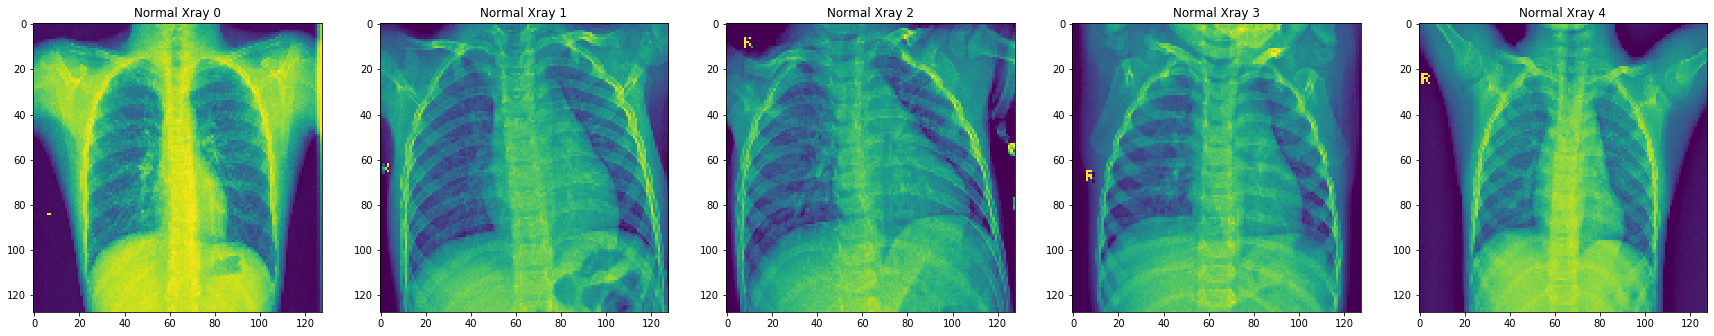

In [5]:
fig,a =  plt.subplots(1,5)
fig.set_figheight(30)
fig.set_figwidth(30)
for i in range(5):
    img = cv.resize(cv.cvtColor(cv.imread(str(train_data.iloc[i]['filepath'])), cv.COLOR_BGR2GRAY),(128,128))
    print(img.flatten())
    a[i].imshow(img)
    title = "Normal Xray " + str(i)
    a[i].set_title(title)

In [6]:
len(test_data)

624

#### read images -> grayscale them -> resize them -> load to dataframe -> export to csv

csv form:

Id, 0,1,2,....,len(Width x Height)
0, 1,0.5,0.3,......,1

In [7]:
traindict = {}
testdict = {}
#mydict[0] = 2
#mydict
import pandas as pd

In [ ]:
for i in range(len(train_data)):
    img = cv.resize(cv.cvtColor(cv.imread(str(train_data.iloc[i]['filepath'])), cv.COLOR_BGR2GRAY),(128,128)).flatten()
    traindict[i] = img
for i in range(len(test_data)):
    img = cv.resize(cv.cvtColor(cv.imread(str(test_data.iloc[i]['filepath'])), cv.COLOR_BGR2GRAY),(128,128)).flatten()
    testdict[i] = img

In [ ]:
train = pd.DataFrame.from_dict(traindict,orient='index')
test = pd.DataFrame.from_dict(testdict,orient='index')

In [ ]:
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)